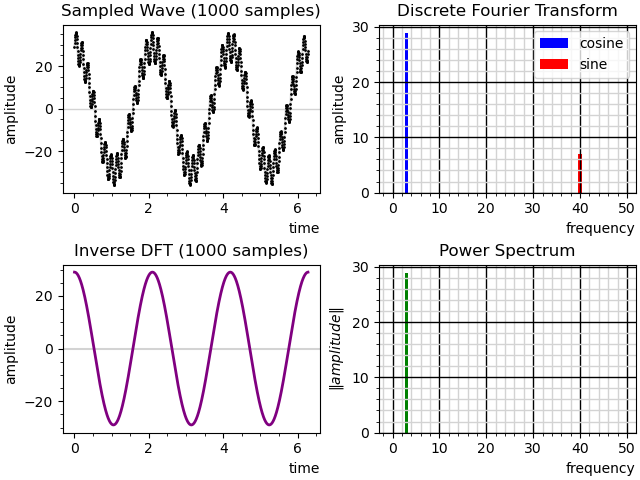

In [2]:
# fourier_filter.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

max_freq = 50


def f(x):
    return 29 * np.cos(3 * x) + 7 * np.sin(40 * x)


def dft(ts, ys):
    num_samples = ts.size
    num_terms = int(num_samples / 2)  # Nyquist limit

    a_cos = np.zeros(num_terms)
    b_sin = np.zeros(num_terms)

    for term in range(0, num_terms):
        a = b = 0
        for sample in range(0, num_samples):
            a += 2 * np.cos(term * ts[sample]) * ys[sample]
            b += 2 * np.sin(term * ts[sample]) * ys[sample]
        a_cos[term] = round(a / num_samples, 8) + 0
        b_sin[term] = round(b / num_samples, 8) + 0

    a_cos[0] /= 2
    b_sin[0] /= 2

    return a_cos, b_sin


def idft(a_cos, b_sin, ts):
    num_terms = a_cos.size
    num_points = ts.size
    yr = np.zeros(num_points)

    for point in range(0, num_points):
        for term in range(0, num_terms):
            yr[point] += a_cos[term] * np.cos(term * ts[point]) + b_sin[term] * np.sin(
                term * ts[point]
            )

    return yr


def power_spec(a_cos, b_sin):
    num_terms = a_cos.size
    ps = np.zeros(num_terms)
    for term in range(0, num_terms):
        ps[term] = np.sqrt(a_cos[term] ** 2 + b_sin[term] ** 2)
    return ps


def plot_samples(ts, ys, ax):
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    ax.plot(
        ts,
        ys,
        color="lightgray",
        marker="o",
        markerfacecolor="none",
        markersize=1,
        markeredgecolor="black",
    )

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_dft(a_cos, b_sin, ax):
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = max(np.amax(np.nonzero(a_cos)), np.amax(np.nonzero(b_sin))) + 1

    ax.bar(range(0, highest_freq), a_cos[:highest_freq], label="cosine", color="blue")
    ax.bar(range(0, highest_freq), b_sin[:highest_freq], label="sine", color="red")

    ax.legend(loc="best")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_idft(ts, yr, ax):
    ax.set_title(f"Inverse DFT ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray")

    ax.plot(ts, yr, color="purple", linewidth=2)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_powerspec(ps, ax):
    ax.set_title("Power Spectrum")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel(r"$\Vert amplitude \Vert$")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = np.amax(np.nonzero(ps)) + 1

    ax.bar(range(0, highest_freq), ps[:highest_freq], color="green")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main():
    sample_duration = 2 * np.pi
    num_samples = 1000

    ts = np.linspace(0, sample_duration, num_samples, endpoint=False)
    ys = f(ts)

    a_cos, b_sin = dft(ts, ys)

    plt.close("all")
    fig = plt.figure("Fourier Filter", constrained_layout=True)

    gs = fig.add_gridspec(2, 2)

    plot_samples(ts, ys, fig.add_subplot(gs[0, 0])) #top left is the raw data
    plot_dft(a_cos, b_sin, fig.add_subplot(gs[0, 1])) #top right is dft transform

    # Filter out the high frequency noise by setting
    # the amplitude of the errant frequency to zero
    a_cos[40] = 0.0 #power spectrum showed that the 40 frequency is mucking up our data,
    #so we clear this frequency out
    b_sin[40] = 0.0

    yr = idft(a_cos, b_sin, ts) #function executes inverse DFT
    ps = power_spec(a_cos, b_sin) #function calculates power spectrum

    plot_idft(ts, yr, fig.add_subplot(gs[1, 0])) #bottom left is recovered data
    plot_powerspec(ps, fig.add_subplot(gs[1, 1])) #power spectrum bottom right

    plt.show()


main()